 ## Classical Mechanics - Week 7 Answers

### Last Week:

- Learned about Simpson's Rule
- Saw the importance of numerical methods
- Worked to debug a function

### This Week:

- Combine everything we've learned so far 
- Work with Force on more than just two bodies 
- Introduce new packages for data visualization 

Hopefully your midterms have gone well so far and if you have any left, good luck! By now you've seen how applicable the simple $F=ma$ is in Classical Mechanics, so let's use this formula once again to study the world around us!

In [7]:
# Below are the usual packages we will need. I'm sure you know why each package is useful 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing(use_unicode=True) 

By working with 3 or more objects in this force problem we have entered the field of **Many-Body Problems**. For now, let's just consider how we can set up our force equations for three interacting masses in space. To keep things simple as possible, we will work in a 2D world:

- $F_1 = \dfrac{Gm_1m_2}{\|\vec{r_1}-\vec{r_2}\|} + \dfrac{Gm_1m_3}{\|\vec{r_1}-\vec{r_3}\|}$
- $F_2 = \dfrac{Gm_2m_1}{\|\vec{r_2}-\vec{r_1}\|} + \dfrac{Gm_2m_3}{\|\vec{r_2}-\vec{r_3}\|}$
- $F_3 = \dfrac{Gm_3m_1}{\|\vec{r_3}-\vec{r_1}\|} + \dfrac{Gm_3m_2}{\|\vec{r_3}-\vec{r_2}\|}$

#### Now, how would we solve for their movement? 

Great question! Loving it! Just like anything else in Physics or life, there are many pathways we can take to solving this issue. But for now we will just discuss one of many ways to solve for their movement.

# Q1.) Go back to your week 3 notebook and review the two methods we utilized (Euler and Verlet). Which method would  you use to try and simulate accurate movement? Why?

&#9989; Double click this cell, erase its content, and put your answer to the above question here.

####### Possible Answers #######

Verlet. This is because it conserves momentum. 

Verlet. This is because it takes into account force.

####### Possible Answers #######

For the sake of consistency as a class, let's use a Verlet implemented method to analylze this. Let's break up the method into separate pieces this time, so we can know what's going on more easily.

__First__: let's define a funciton that updates our variables, using Verlet's method, every time we call it. (***Hint: take the algorithm within the for-loop from Verlet. We already provide you with the variables one needs to enter into the function***)

In [14]:
def VerletForward(pos,a,v,h,i):
    pos[i+1] = pos[i] + h*v[i] + (h**2/2)*a[i]
    a[i+1] = -4*np.pi**2*pos[i+1]/np.linalg.norm(pos[i+1])**3
    v[i+1] = v[i] + h*a[i] + (h/2)*(a[i+1] - a[i])    

Now that we have this funciton, we need to figure out how it can be used to work with a three-body problem. If we use the for

In [15]:
def VerletPlanetary(tf,N):
    r = 1 # The Earth is 1 AU away from the Sun
    x_i = 1
    y_i = 0
    vx_i = 0
    vy_i = 2*np.pi
    ax_i = -4*np.pi**2*x_i/r**3
    ay_i = 0
    h = (tf)/N
    
    v = np.zeros((N,2))
    pos = np.zeros((N,2))
    a = np.zeros((N,2))
    p = np.zeros(N)
    v[0] = [vx_i,vy_i]
    pos[0] = [x_i, y_i]
    a[0] = [ax_i,ay_i]
    m = 6*10**24 #kg; mass of the Earth like planet
    p[0] = np.linalg.norm(v[0])*m
    for i in range(0,N-1):
        VerletForward(pos,a,v,h,i)
        p[i+1] = np.linalg.norm(v[i+1])*m
    
    plt.grid()
    plt.plot(pos[:,0],pos[:,1])
    print("Ratio of max and min momentum: ", min(p)/max(p))
    print("p_min: ", min(p))
    print("p_max: ", max(p))

Ratio of max and min momentum:  0.9999802613756271
p_min:  3.769836771446966e+25
p_max:  3.7699111843077523e+25


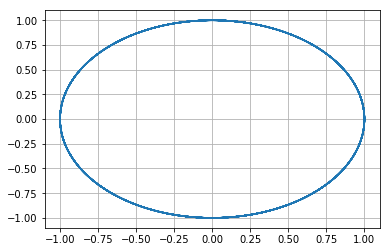

In [16]:
VerletPlanetary(10,10000)

In the function you have initalized above, you will need to factor in the third body